# Imports

In [2]:
import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pl
import statsmodels.formula.api as smf
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge, LassoCV, Ridge, Lasso
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
%matplotlib inline

# Load Data

In [3]:
df = pd.read_csv('Data/master_updated.csv', index_col='District')
df.drop('Unnamed: 0', axis=1, inplace=True)

X = df.iloc[:, range(42)].drop('Total Pop Census', axis=1)
X_novacc = df.iloc[:, range(25) + range(38,42)].drop('Total Pop Census', axis=1)
Y = df.iloc[:, range(42, 64)]

# What does the disease data look like?

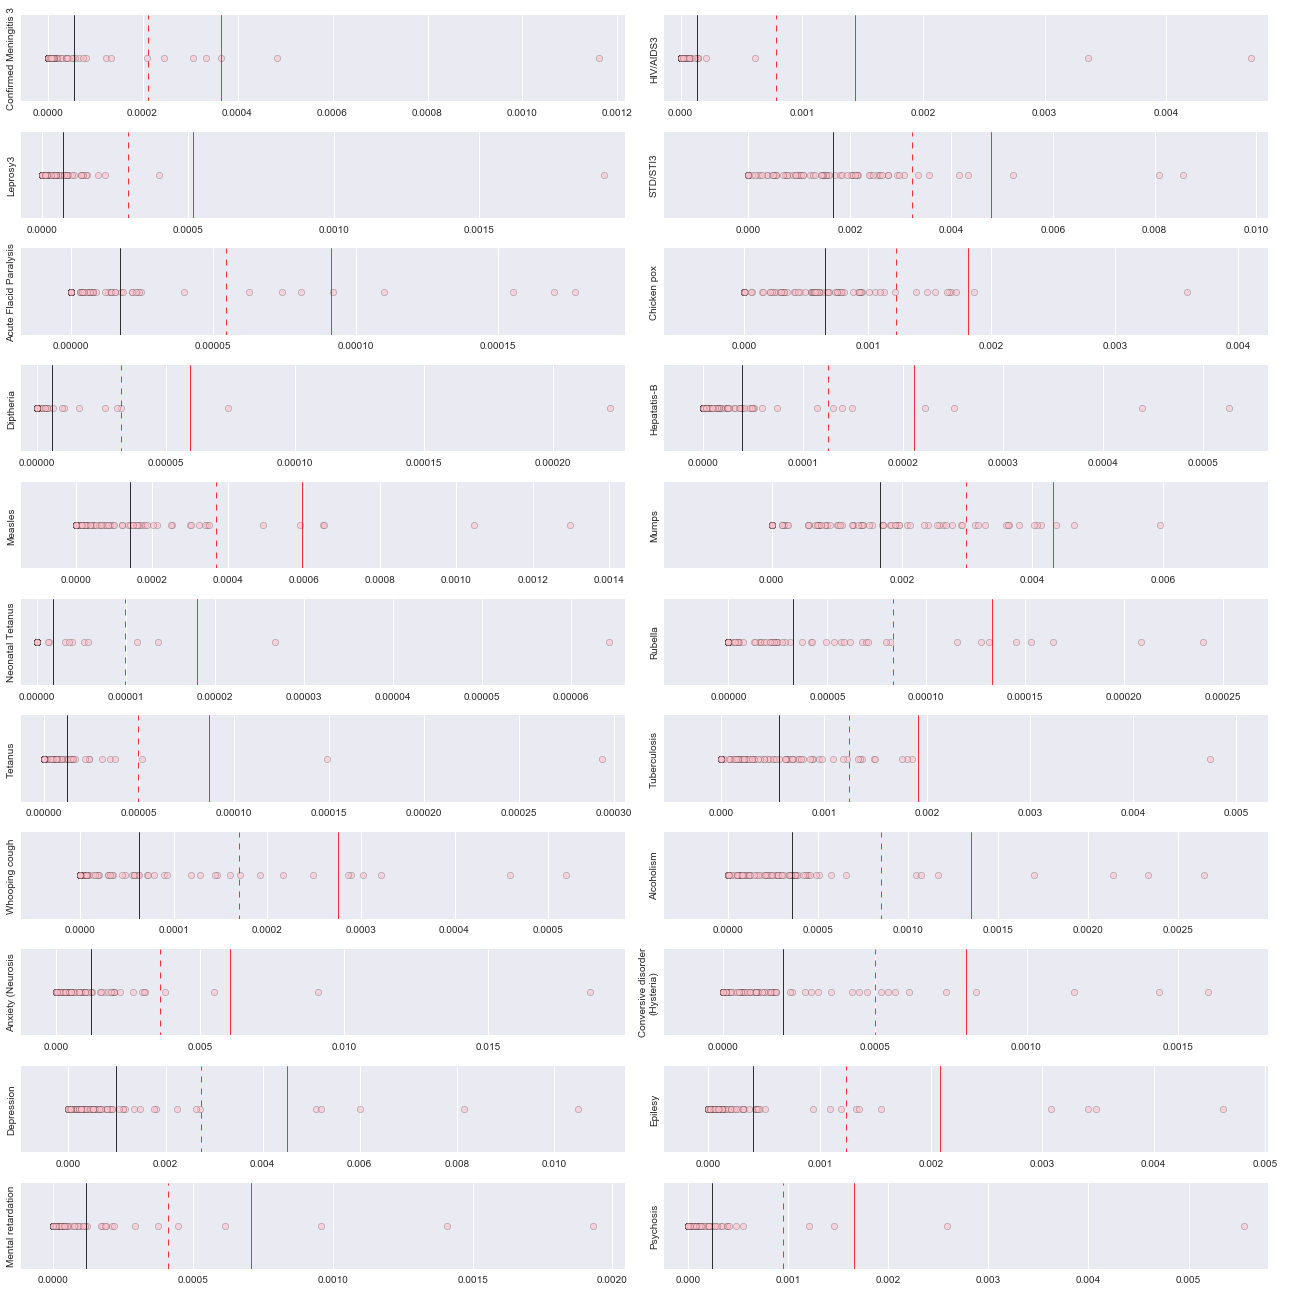

In [4]:
# Plot by groups
fig, ([ax1, ax2], [ax3, ax4],
      [ax5, ax6], [ax7, ax8],
      [ax9, ax10], [ax11, ax12],
      [ax13, ax14], [ax15, ax16],
      [ax17, ax18], [ax19, ax20],
      [ax21, ax22],) = pl.subplots(nrows = 11, ncols = 2, figsize = (18, 18))

fig.tight_layout(h_pad=1)

for i in enumerate(fig.axes):
    i[1].axes.get_yaxis().set_ticks([])
    i[1].axvline(x=np.array(Y[[i[0]]]).mean(), ymin=-1, ymax=1, c='k', lw=0.8)
    i[1].axvline(x=np.array(Y[[i[0]]]).mean()+np.array(Y[[i[0]]]).std(), ymin=-1, ymax=1, c='r', ls='--', lw=0.8)
    i[1].axvline(x=np.array(Y[[i[0]]]).mean()+np.array(Y[[i[0]]]).std()*2, ymin=-1, ymax=1, c='r', lw=0.8)
    i[1].scatter(Y[[i[0]]], np.zeros(Y[[i[0]]].shape), c='pink', s=40, alpha=0.6)
    i[1].set_xlim(np.array(Y[[i[0]]]).min() - np.array(Y[[i[0]]]).mean(),
                 np.array(Y[[i[0]]]).max() + np.array(Y[[i[0]]]).mean())
    i[1].set_ylabel(Y[[i[0]]].columns[0], fontsize = 10)

# Bayesian Ridge Model Scoring

In [5]:
model = BayesianRidge(compute_score=True)
for i in range(22):
    model.fit(X, Y[[i]])
    print Y[[i]].columns[0] + ': ', str(model.score(X, Y[[i]]))

Confirmed Meningitis 3:  0.124158606641
HIV/AIDS3:  0.137329508745
Leprosy3:  0.113368676067
STD/STI3:  0.197075573348
Acute Flacid Paralysis:  0.117078725943
Chicken pox:  0.373793721991
Diptheria:  0.141824201938
Hepatatis-B:  0.222548576481
Measles:  0.212608529805
Mumps:  0.397516005158
Neonatal Tetanus:  0.184044721005
Rubella:  0.159744189656
Tetanus:  0.0843644044558
Tuberculosis:  0.175515911973
Whooping cough:  0.154142917724
Alcoholism:  0.108104731805
Anxiety (Neurosis:  0.0991732970756
Conversive disorder
(Hysteria):  0.112661203424
Depression:  0.108594035931
Epilesy:  0.118283288431
Mental retardation:  0.111610072738
Psychosis:  0.110210655164


/Users/JordanVani/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Linear Regression

In [6]:
# Including vaccines in data X.
reg_summary = []
for i in range(Y.shape[1]):
    reg = smf.OLS(Y.iloc[:, i], X).fit()
    try:
        reg1 = smf.OLS(Y.iloc[:, i], X[reg.pvalues[reg.pvalues < 0.05].index]).fit()
    except:
        pass
    d = [Y.iloc[:, i].name, reg.rsquared, reg.rsquared_adj, reg.f_pvalue,
         list(reg.pvalues[reg.pvalues < 0.05].index), reg1.rsquared, reg1.rsquared_adj, reg1.f_pvalue,]
    reg_summary.append(d)

pd.DataFrame(reg_summary,
             columns=['Variable', 'RSquared', 'RsquaredAdj', 'ProbFStat', 'SigVars',
                      'SV_RSquared', 'SV_RsquaredAdj', 'SV_ProbFStat']
            ).sort_values('ProbFStat', ascending=True)

,Variable,RSquared,RsquaredAdj,ProbFStat,SigVars,SV_RSquared,SV_RsquaredAdj,SV_ProbFStat
5,Chicken pox,0.884363,0.752665,3.504298e-08,"[Poverty Gap, Poverty Incidence, Poverty Sever...",0.766488,0.750272,2.109926e-21
9,Mumps,0.872474,0.727237,1.594825e-07,[Mtn/Hill Janajati A],0.608237,0.603082,3.975878e-17
1,HIV/AIDS3,0.823450,0.622380,1.955725e-05,"[Mtn/Hill Janajati A, Other undefined, Depriva...",0.584980,0.515810,4.568997e-09
3,STD/STI3,0.822105,0.619501,2.177118e-05,[Sex Ratio (male per 100 female)],0.135408,0.124031,9.179533e-04
15,Alcoholism,0.817401,0.609442,3.140910e-05,"[Hill Brahman, Musalman, Other undefined, Peop...",0.514258,0.465684,5.274441e-09
2,Leprosy3,0.814582,0.603412,3.889210e-05,"[Madhesi Dalit, Mtn/Hill Janajati A, Newar, Po...",0.667720,0.580565,1.927647e-09
13,Tuberculosis,0.785626,0.541479,2.771659e-04,"[Hill Brahman, Deprivation in economic provisi...",0.588214,0.547035,2.238400e-11
8,Measles,0.732144,0.427086,4.381495e-03,"[Newar, Poverty Severity, People not expected ...",0.421696,0.381536,1.355396e-07
17,Conversive disorder\n(Hysteria),0.699226,0.356677,1.580855e-02,"[Mtn/Hill Janajati B, Musalman, BCG3, DPT-HepB...",0.407214,0.357119,1.065094e-06
18,Depression,0.699199,0.356620,1.582338e-02,"[Hill Brahman, Mtn/Hill Janajati A, Adult illi...",0.392125,0.340756,2.422991e-06


In [13]:
# Excluding vaccines in X.
reg_summary = []
for i in range(Y.shape[1]):
    reg = smf.OLS(Y.iloc[:, i], X_novacc).fit()
    try:
        reg1 = smf.OLS(Y.iloc[:, i], X_novacc[reg.pvalues[reg.pvalues < 0.05].index]).fit()
    except:
        pass
    d = [Y.iloc[:, i].name, reg.rsquared, reg.rsquared_adj, reg.f_pvalue,
         list(reg.pvalues[reg.pvalues < 0.05].index), reg1.rsquared, reg1.rsquared_adj, reg1.f_pvalue,]
    reg_summary.append(d)

pd.DataFrame(reg_summary,
             columns=['Variable', 'RSquared', 'RsquaredAdj', 'ProbFStat', 'SigVars',
                      'SV_RSquared', 'SV_RsquaredAdj', 'SV_ProbFStat']
            ).sort_values('ProbFStat', ascending=True)


,Variable,RSquared,RsquaredAdj,ProbFStat,SigVars,SV_RSquared,SV_RsquaredAdj,SV_ProbFStat
5,Chicken pox,0.848520,0.761960,4.739212e-12,"[HDI , Sex Ratio (male per 100 female)]",0.447977,0.433257,2.105623e-10
9,Mumps,0.845154,0.756670,7.731142e-12,"[Mtn/Hill Janajati A, Sanitation Coverage (%, ...",0.625636,0.610459,9.001751e-16
3,STD/STI3,0.765434,0.631397,5.996585e-08,"[Sanitation Coverage (%, Water Coverage Supply...",0.084003,0.059577,3.724128e-02
2,Leprosy3,0.712568,0.548321,3.641383e-06,"[Mtn/Hill Janajati A, Poverty Gap, Poverty Sev...",0.583906,0.535664,1.247094e-10
1,HIV/AIDS3,0.691838,0.515745,1.401629e-05,"[Other undefined, Deprivation in economic prov...",0.553110,0.501297,1.255110e-09
15,Alcoholism,0.636784,0.429232,2.893846e-04,"[Hill Brahman, Sanitation Coverage (%, Water C...",0.391216,0.366536,4.687009e-08
13,Tuberculosis,0.609240,0.385948,1.022714e-03,"[Hill Brahman, Tarai Janajati]",0.476958,0.463010,2.786933e-11
14,Whooping cough,0.585474,0.348603,2.708898e-03,[Newar],0.158768,0.147699,3.025453e-04
18,Depression,0.543718,0.282986,1.191878e-02,"[Hill Brahman, Mtn/Hill Janajati A, Adult illi...",0.384075,0.350325,3.121841e-07
8,Measles,0.535829,0.270589,1.529808e-02,[],0.185986,0.164279,4.453422e-04


# Random Forest Regressor

In [17]:
tree_summary = []

for i in range(Y.shape[1]):
    reg_tree = RandomForestRegressor().fit(X, Y.iloc[:, i])
    score = reg_tree.score(X, Y.iloc[:, i])
    f = filter(lambda x: x[1] > 0, zip(X.columns, reg_tree.feature_importances_))
    f = sorted(f, key=lambda x: x[1], reverse=True)
    d = [Y.iloc[:, i].name, score, f]
    tree_summary.append(d)

pd.DataFrame(tree_summary, columns=['Variable', 'Score', 'FeatureImportance']).sort_values('Score', ascending=False)

,Variable,Score,FeatureImportance
1,HIV/AIDS3,0.858529,"[(HPI, 0.392067457797), (DPT-HepB 3 3, 0.10282..."
9,Mumps,0.793028,"[(Other undefined, 0.158283690669), (Mtn/Hill ..."
18,Depression,0.765033,"[(Hill Brahman, 0.182668887606), (Madhesi Brah..."
3,STD/STI3,0.754962,"[(Children <5 years malnourished, 0.0976249038..."
16,Anxiety (Neurosis,0.745685,"[(Hill Brahman, 0.154088371941), (HPI, 0.12258..."
5,Chicken pox,0.697881,"[(Mtn/Hill Janajati A, 0.330193745858), (Child..."
13,Tuberculosis,0.684668,"[(Tarai Janajati, 0.171684096124), (HPI, 0.125..."
21,Psychosis,0.602813,"[(Foreigner, 0.104333368357), (Newar, 0.096605..."
15,Alcoholism,0.592719,"[(Foreigner, 0.325273351674), (People not expe..."
19,Epilesy,0.590692,"[(TT 2+ 3, 0.182852097554), (Foreigner, 0.1274..."


In [14]:
tree_summary = []

for i in range(Y.shape[1]):
    reg_tree = RandomForestRegressor().fit(X_novacc, Y.iloc[:, i])
    score = reg_tree.score(X_novacc, Y.iloc[:, i])
    f = filter(lambda x: x[1] > 0, zip(X_novacc.columns, reg_tree.feature_importances_))
    f = sorted(f, key=lambda x: x[1], reverse=True)
    d = [Y.iloc[:, i].name, score, f]
    tree_summary.append(d)

pd.DataFrame(tree_summary, columns=['Variable', 'Score', 'FeatureImportance']).sort_values('Score', ascending=False)

[('HPI', 0.58599837333362492),
 ('Children <5 years malnourished', 0.10000000000000001),
 ('Hill Chhetree', 0.0028988534181613556),
 ('Madhesi Brahman/Chhetree', 0.0028199376169364822),
 ('Tarai Janajati', 0.002819672920611358),
 ('Mtn/Hill Janajati B', 0.0028062196843711322),
 ('Poverty Severity', 0.0026569430262947092)]